# 최적화 기초

데이터 분석 문제 특히 예측 문제의 최종 목표는 실제 자료와 가장 유사한 값을 출력하는 예측기를 설계하는 것이다. 이 과정에서 예측 오차를 최소화하는 예측기 계수를 찾는 최적화(optimization) 문제를 풀어야 한다.

## 최적화 문제

최적화 문제는 특정한 제한 조건(constraint)을 만족시키면서 함수 $f$의 값을 최소화하는 변수 $x$의 값 $x^{\ast}$를 찾는 것이다. 최대화 문제는 $f(x)$ 를 $-f(x)$ 로 바꾸면 풀 수 있다.

$$ x^{\ast} = \underset{x}{\operatorname{arg\,min}} \; f(x) $$

$$ \text{subject to } g(x) \geq 0, \;\;\; h(x) = 0 $$

이 때 제한 조건이 없으면 uncontrained optimzation, 제한 조건이 있으면 constrained optimization 이라고 한다. 또 최소화 혹은 최대화 하려는 함수를 목표 함수(objective function)이라고 한다.

## 기울기 필요 조건

어떤 종속 변수 값 $x^{\ast}$ 가 최소점이 되기 위해서는 일단 다음과 같이 값 $x^{\ast}$에서 함수의 기울기(slope) $\dfrac{df}{dx}$ 가 0이라는 조건을 만족해야 한다.


* 단일 변수에 대한 함수인 경우, 미분값이 0

$$ \dfrac{df(x)}{dx} = 0 $$


* 다변수 함수인 경우 모든 변수에 대한 편미분값이 0

$$ \dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_1} = 0 $$


$$ \dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_2} = 0 $$
$$ \vdots $$
$$ \dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_N} = 0 $$


## 수치적 최적화

반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값 $x^{\ast}$를 찾는 방법을 수치적 최적화(numerical optimization)이라고 한다. 

일반적인 수치적 최적화 알고리즘들은 다음과 같은 것들이 있다.

* Steepest Gradient Descent
* Conjuated Gradient 
* Quasi-Newton (BFGS: Broyden-Fletcher-Goldfarb-Shanno)


이 방법들은 모두 임의의 해 $x_k$를 가정하고 이 위치에서의 1차 도함수(gradient) 값 $g(x_k)$ 및 2차 도함수(Hessian) 값 $H(x_k)$ 를 사용하여 다음 위치를 $x_{k+1}$ 를 추정하는 과정을 반복하여 최소점을 찾아낸다.

### Steepest Gradient Descent 방법

Steepest Gradient Descent 방법은 다음과 같이 단순히 현재 위치에서의 기울기 값 $g(x_k)$ 만을 이용한다. 

$$ x_{k+1} = x_{k} - \alpha_k g(x_k) $$

이 방법은 곡면의 모양이 좋지 않을 경우에는 수렴하는데 시간이 오래 걸린다.

<img src="https://datascienceschool.net/upfiles/8dc79df23e7e48729cb252f5a09d1a97.png" style="width:80%; margin: 0 auto 0 auto;" >

## CG & BFGS

CG(conjujated grdient) 방법이나 BFGS 방법은 모두 최적화하려는 영역을 2차 함수로 가정하고 2차 도함수인 헤시안 행렬 정보를 이용하여 더 빠르고 안정적으로 수렴하도록 한다. 

<img src="https://datascienceschool.net/upfiles/a5ba6251b6f144249cca6eb8cc523682.png" style="width:50%; margin: 0 auto 0 auto;" >

SciPy의 optimize 서브 패키지는  최적화 명령 `minimize` 를 제공한다. 세부적인 알고리즘은 `method` 인수로 선택할 수 있다. 디폴트 알고리즘은 BFGS 방법이다.

## 전역 최적화 문제

만약 최적화 하려는 함수가 복수의 국소 최저점(local minima)을 가지고 있는 경우에는 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장이 없다. 결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존한다.

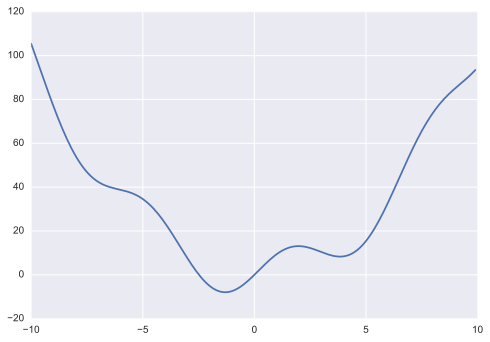

In [2]:
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x));

In [3]:
result = sp.optimize.minimize(f, 4)
print(result)
x0 = result['x']
x0

      fun: 8.315585579479809
 hess_inv: array([[ 0.1186092]])
      jac: array([  6.43730164e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 3.83746785])


array([ 3.83746785])

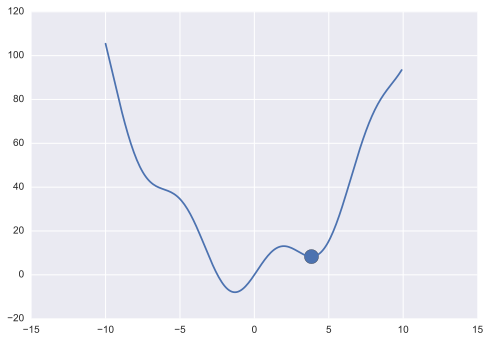

In [5]:
plt.plot(x, f(x));
plt.hold(True)
plt.scatter(x0, f(x0), s=200);

## 등식 제한 조건이 있는 최적화

다음과 같이 $ g(x) = 0 $ 이라는 등식(equality) 제한 조건이 있는 최소화 문제를 생각하자
 
$$ x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x)=0$$

이렇게 등식 제한 조건이 있는 최적화 문제는 **라그랑주 승수법(Lagrange multiplier)**을 사용하여 최적화 할 수 있다.

라그랑주 승수 방법에서는 $f$가 아닌 $h = f + \lambda g$를 최적화한다. $h$ 는 독립 변수 $\lambda$가 추가된 함수 $h(x_1, x_2, \cdots , x_N, \lambda) $가 되므로 다음 조건을 만족해야 한다.

$$ \dfrac{\partial (f + \lambda g)}{\partial x_1} = \dfrac{\partial f}{\partial x_1} = 0 $$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_2} = \dfrac{\partial f}{\partial x_2}= 0 $$
$$ \vdots $$
$$ \dfrac{\partial (f + \lambda g)}{\partial x_N} = \dfrac{\partial f}{\partial x_N}= 0 $$

$$ \dfrac{\partial (f + \lambda g)}{\partial \lambda} = g = 0 $$


예를 들어 다음과 같은 함수 $f$를 최적화하는 문제를 라그랑주 승수법으로 풀어보자.

$$ f(x_1, x_2) = \log{x_1} + \log{x_2} $$

여기에서 $x_1$, $x_2$는? 단 $ x_1 + x_2 = 1 $ 을 만족해야 한다.

$$ h = f + \lambda g = \log{x_1} + \log{x_2} + \lambda ( x_1 + x_2 - 1 ) $$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_1} = \dfrac{1}{x_1} + \lambda = 0$$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_2} = \dfrac{1}{x_2} + \lambda = 0 $$


$$ \dfrac{\partial (f + \lambda g)}{\partial \lambda } = x_1 + x_2 - 1 = 0 $$


$$ x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = -2 $$

## 부등식 제한 조건이 있는 최적화

다음과 같이 $ g(x) \geq 0 $ 이라는 등식(equality) 제한 조건이 있는 최소화 문제를 생각하자
 
$$ x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x) \geq 0$$

이렇게 부등식 제한 조건이 있는 최적화 문제는 최소점 위치에서의 조건을 변형한 KKT(Karush-Kuhn-Tucker) 방법으로 최적화 한다.

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 `fmin_slsqp` 명령을 제공한다.

<img src="https://datascienceschool.net/upfiles/eec248f4c5234a41a20d9baba492a696.png" >

In [7]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f, np.array([0, 0]), ieqcons=[constraint, ])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.47487373504
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([ 1.25004696,  0.24995304])